<a href="https://colab.research.google.com/github/whgustj00/DataVisualization/blob/main/%EC%A0%95%EB%B3%B4%EB%B6%84%EC%84%9D_%EC%9D%B4%EB%8F%99%ED%86%B5%EC%8B%A0_%ED%8A%B8%EB%9E%98%ED%94%BD_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 필요한 패키지 설치

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
plt.rcParams['figure.dpi'] = 100

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,276 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
pip install folium geopandas


In [ ]:
# 한글 폰트로 변경
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')


In [ ]:
pip install chardet


In [ ]:
import chardet

# 파일의 인코딩 감지
with open('traffic.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)

# 감지된 인코딩을 사용하여 파일 읽기
df = pd.read_csv("traffic.csv", encoding=result['encoding'])

# 데이터 샘플 확인
df.head()


{'encoding': 'EUC-KR', 'confidence': 0.99, 'language': 'Korean'}


,단말기별,항목,2015.01,2015.02,2015.03,2015.04,2015.05,2015.06,2015.07,2015.08,...,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09,2023.10,2023.11,2023.12,2024.01
0,합계,전체트래픽 (TB),117712,113920,124940,130543,136973,136241,149105,155462,...,942022,1002307,1008744,1029123,1048475,1042072,1068709,1007068,1031794,1022792
1,합계,1가입자당 트래픽 (mb),2153,2094,2291,2386,2494,2475,2700,2811,...,12935,13944,14517,19335,19918,19539,19935,18780,19259,19072
2,2G·3G 피처폰,전체트래픽 (TB),72,70,76,73,59,41,43,44,...,11,13,13,5,5,4,5,4,4,5
3,2G·3G 피처폰,1가입자당 트래픽 (mb),5,5,5,5,4,3,3,3,...,5,6,6,8,7,6,7,7,7,9
4,3G 스마트폰,전체트래픽 (TB),5018,4198,4232,3959,3750,3309,3224,2989,...,20,17,15,11,13,13,13,10,11,11


In [ ]:
# 긴 형태로 변환
df_melted = pd.melt(df, id_vars=['단말기별', '항목'], var_name='월', value_name='값')

# 변환 후 DataFrame 확인
print(df_melted.head())

# '월' 열을 datetime 형식으로 변환
df_melted['월'] = pd.to_datetime(df_melted['월'], format='%Y.%m')

# 변환 후 DataFrame 확인
print(df_melted.head())

        단말기별              항목        월       값
0         합계      전체트래픽 (TB)  2015.01  117712
1         합계  1가입자당 트래픽 (mb)  2015.01    2153
2  2G·3G 피처폰      전체트래픽 (TB)  2015.01      72
3  2G·3G 피처폰  1가입자당 트래픽 (mb)  2015.01       5
4    3G 스마트폰      전체트래픽 (TB)  2015.01    5018
        단말기별              항목          월       값
0         합계      전체트래픽 (TB) 2015-01-01  117712
1         합계  1가입자당 트래픽 (mb) 2015-01-01    2153
2  2G·3G 피처폰      전체트래픽 (TB) 2015-01-01      72
3  2G·3G 피처폰  1가입자당 트래픽 (mb) 2015-01-01       5
4    3G 스마트폰      전체트래픽 (TB) 2015-01-01    5018


In [ ]:
# 연도 데이터 생성
df_melted['연도'] = df_melted['월'].dt.year

# DataFrame 확인
print(df_melted.head())


        단말기별              항목          월       값    연도
0         합계      전체트래픽 (TB) 2015-01-01  117712  2015
1         합계  1가입자당 트래픽 (mb) 2015-01-01    2153  2015
2  2G·3G 피처폰      전체트래픽 (TB) 2015-01-01      72  2015
3  2G·3G 피처폰  1가입자당 트래픽 (mb) 2015-01-01       5  2015
4    3G 스마트폰      전체트래픽 (TB) 2015-01-01    5018  2015


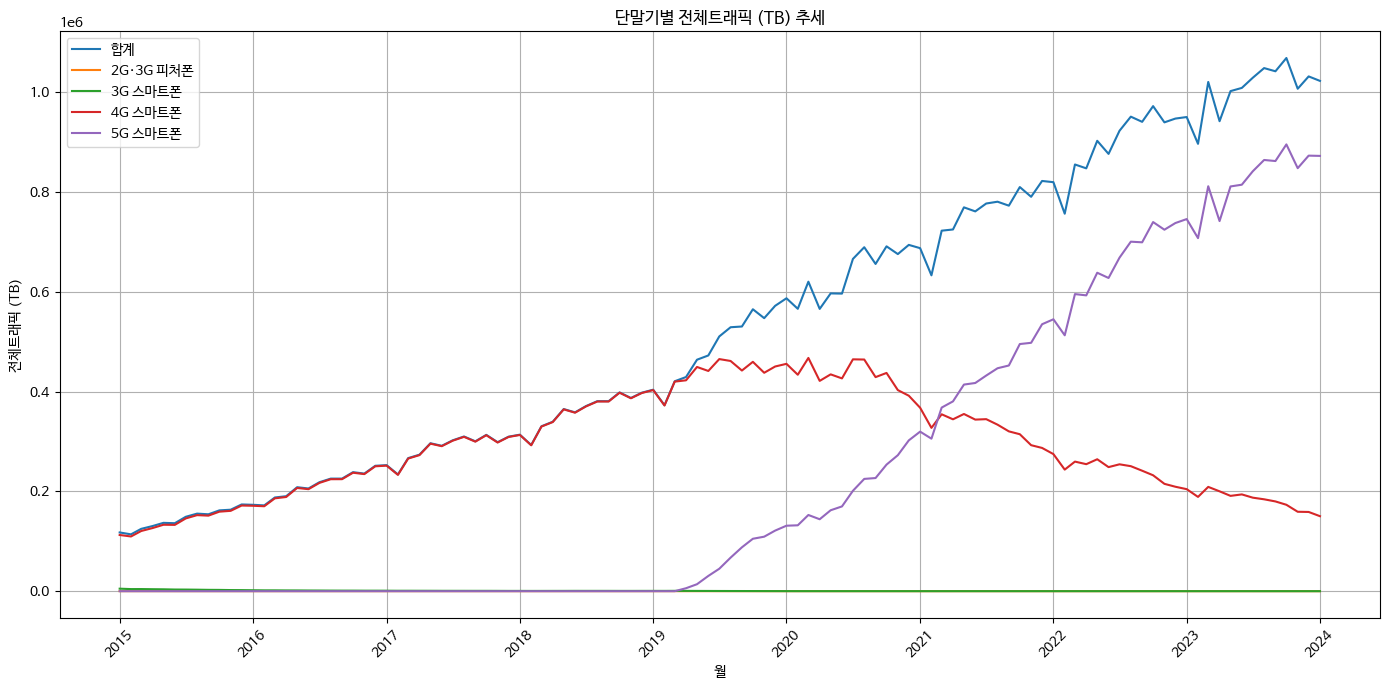

In [ ]:
# 전체 트래픽 (TB) 시각화
plt.figure(figsize=(14, 7))
for device in df_melted['단말기별'].unique():
    if '전체트래픽 (TB)' in df_melted['항목'].unique():
        subset = df_melted[(df_melted['단말기별'] == device) & (df_melted['항목'] == '전체트래픽 (TB)')]
        plt.plot(subset['월'], subset['값'], label=device)

plt.xlabel('월')
plt.ylabel('전체트래픽 (TB)')
plt.title('단말기별 전체트래픽 (TB) 추세')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


단말기별 전체 트래픽(TB) 추세 그래프

5G의 등장으로 다른 단말기들의 트래픽량이 감소, 합계 추세의 상승폭이 더 커짐.

4G 단말기 이용자들이 5G 단말기로 바꾼다는 것을 알 수 있음.

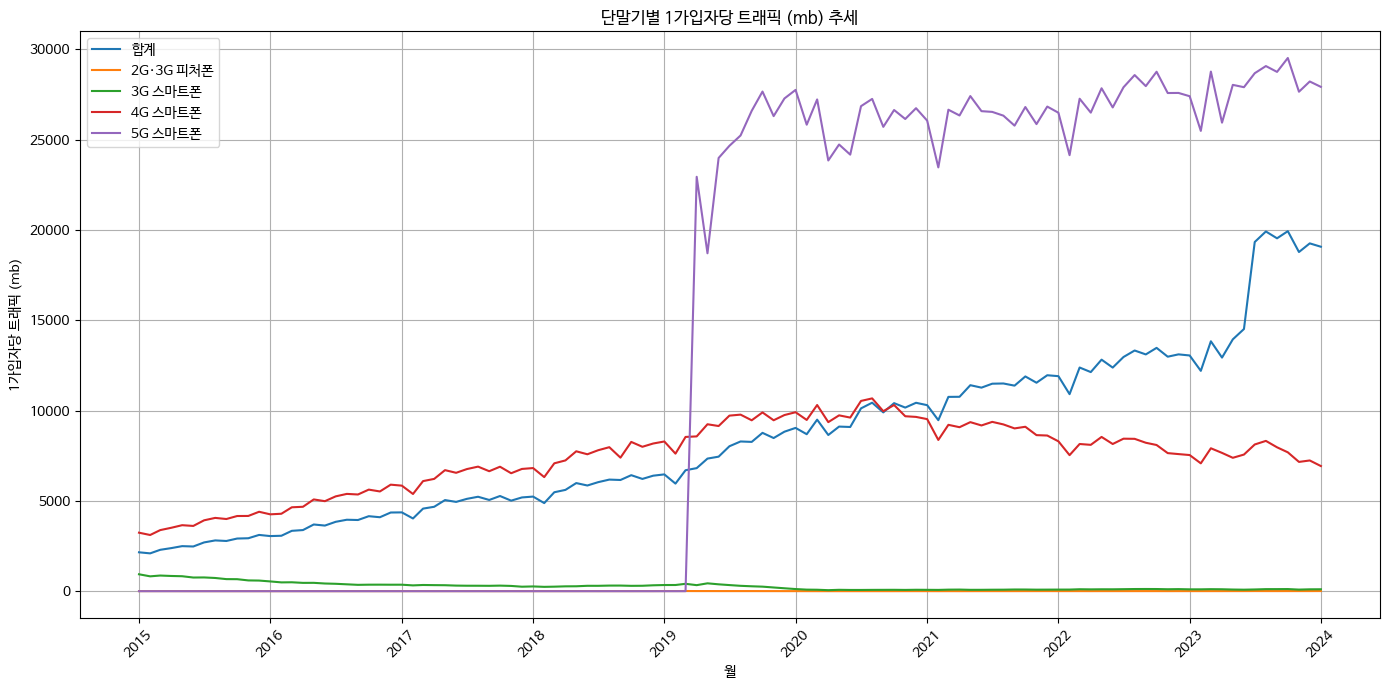

In [ ]:
# 1가입자당 트래픽 (mb) 시각화
plt.figure(figsize=(14, 7))
for device in df_melted['단말기별'].unique():
    if '1가입자당 트래픽 (mb)' in df_melted['항목'].unique():
        subset = df_melted[(df_melted['단말기별'] == device) & (df_melted['항목'] == '1가입자당 트래픽 (mb)')]
        plt.plot(subset['월'], subset['값'], label=device)

plt.xlabel('월')
plt.ylabel('1가입자당 트래픽 (mb)')
plt.title('단말기별 1가입자당 트래픽 (mb) 추세')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


단말기별 1가입자당 트래픽(MB) 추세 그래프

5G 단말기의 등장으로 추가적인 기술 지원이 되며 그에 따른 트래픽량이 증가.

이후 콘텐츠 별 기술이 발전함에 따라 5G 단말기의 트래픽량은 더 상승할 것으로 예상.

또한 5G 이후 6G 등의 기술이 등장하게 된다면 5G의 트래픽량보다 훨씬 커질 것으로 예상.

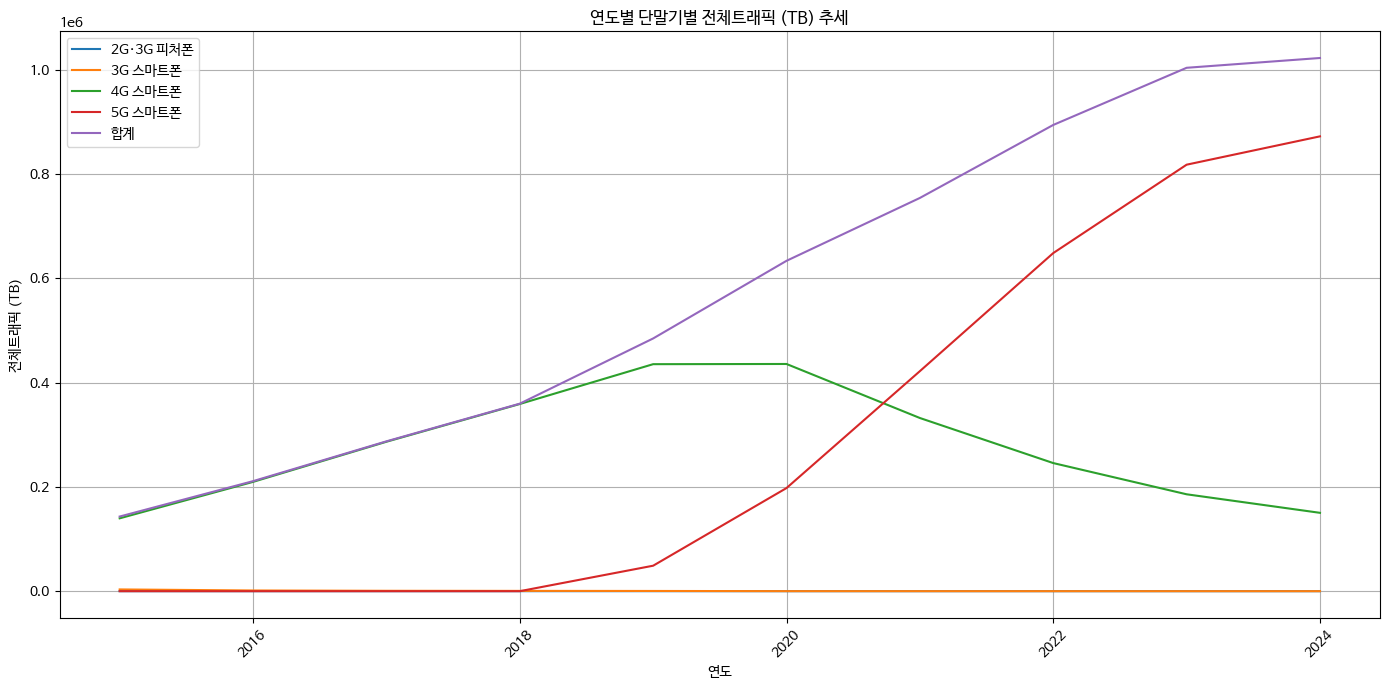

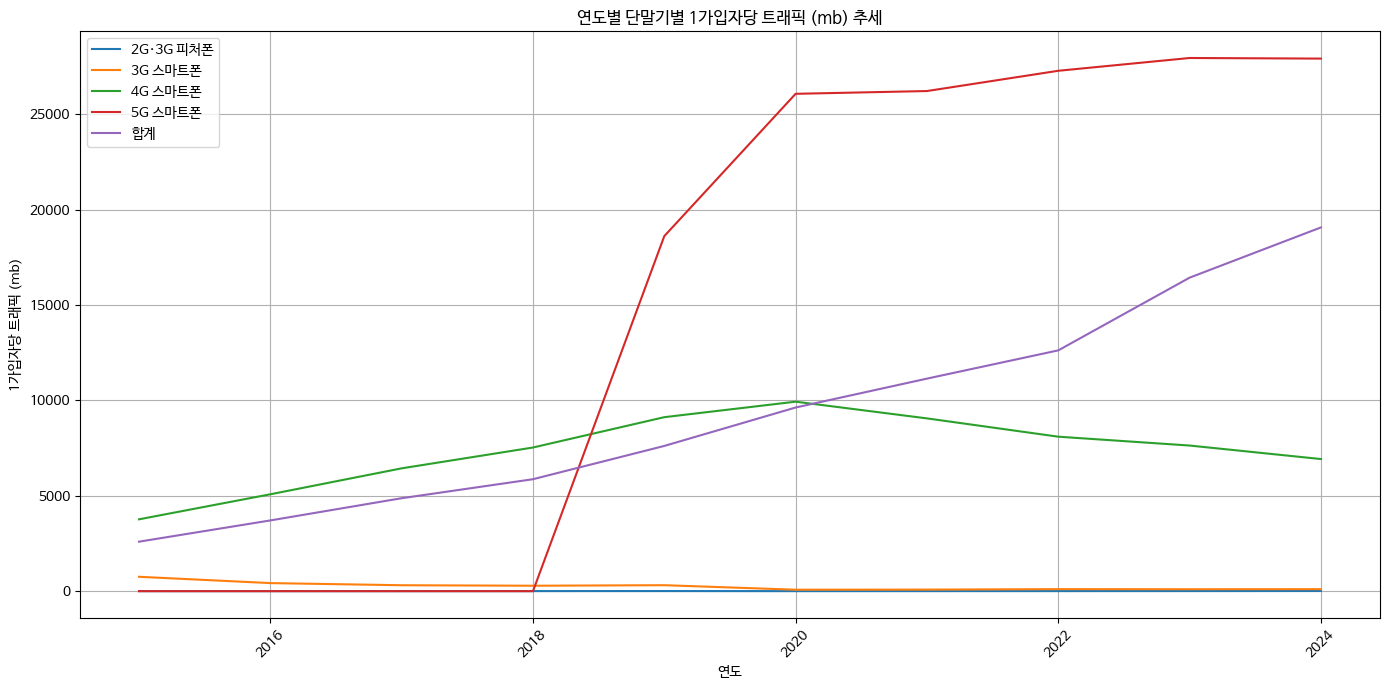

In [ ]:
# 연도별 평균 계산을 위한 'Year' 열 추가
df_melted['Year'] = df_melted['월'].dt.year

# 연도별 평균 계산
annual_avg = df_melted.groupby(['Year', '단말기별', '항목'])['값'].mean().reset_index()

# 연도별 전체 트래픽 (TB) 추세 시각화
plt.figure(figsize=(14, 7))
for device in annual_avg['단말기별'].unique():
    if '전체트래픽 (TB)' in annual_avg['항목'].unique():
        subset = annual_avg[(annual_avg['단말기별'] == device) & (annual_avg['항목'] == '전체트래픽 (TB)')]
        plt.plot(subset['Year'], subset['값'], label=device)

plt.xlabel('연도')
plt.ylabel('전체트래픽 (TB)')
plt.title('연도별 단말기별 전체트래픽 (TB) 추세')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 연도별 1가입자당 트래픽 (mb) 추세 시각화
plt.figure(figsize=(14, 7))
for device in annual_avg['단말기별'].unique():
    if '1가입자당 트래픽 (mb)' in annual_avg['항목'].unique():
        subset = annual_avg[(annual_avg['단말기별'] == device) & (annual_avg['항목'] == '1가입자당 트래픽 (mb)')]
        plt.plot(subset['Year'], subset['값'], label=device)

plt.xlabel('연도')
plt.ylabel('1가입자당 트래픽 (mb)')
plt.title('연도별 단말기별 1가입자당 트래픽 (mb) 추세')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:

# 파일을 cp949로 인코딩하여 읽기
df2 = pd.read_csv("heavy_traffic.csv", encoding='cp949')

# 데이터 샘플 확인
df2.head()

,시점,3G 전체 트래픽 (TB),3G 상위 1% 트래픽 (TB),3G 상위 1% 비중 (%),3G 상위 5% 이용자 트래픽 (TB),3G 상위 5% 비중 (%),3G 상위 10% 트래픽 (TB),3G 상위 10% 비중 (%),4G 전체 트래픽 (TB),4G 상위 1% 트래픽 (TB),...,4G 상위 5% 비중 (%),4G 상위 10% 트래픽 (TB),4G 상위 10% 비중 (%),5G 전체 트래픽 (TB),5G 상위 1% 트래픽 (TB),5G 상위 1% 비중 (%),5G 상위 5% 트래픽 (TB),5G 상위 5% 비중 (%),5G 상위 10% 트래픽 (TB),5G 상위 10% 비중 (%)
0,2015.1/4,4302,2065,48.0,3468,80.6,3871,90.0,120947,20192,...,40.6,66589,55.1,-,-,-,-,-,-,-
1,2015.2/4,3344,1697,50.8,2729,81.6,2991,89.4,133254,22107,...,41.7,75573,56.7,-,-,-,-,-,-,-
2,2015.3/4,2709,1427,52.7,2205,81.4,2394,88.4,152148,25130,...,41.7,86747,57.0,-,-,-,-,-,-,-
3,2015.4/4,2161,1216,56.3,1737,80.4,1852,85.7,172935,29733,...,43.3,102123,59.1,-,-,-,-,-,-,-
4,2016.1/4,1702,980,57.6,1327,77.9,1390,81.6,188011,32127,...,43.3,111531,59.3,-,-,-,-,-,-,-


In [ ]:
# '-' 값을 NaN으로 치환
df2.replace('-', np.nan, inplace=True)

In [ ]:
# '시점' 열을 문자열로 변환하여 연도와 분기 분리
df2['Year'] = df2['시점'].str.split('.').str[0].astype(int)  # 연도 추출
df2['Quarter'] = df2['시점'].str.split('.').str[1].str.split('/').str[0].astype(int)  # 분기 추출

# '연도'와 '분기'를 이어주는 함수 정의
def combine_year_quarter(row):
    return str(row['Year']) + '-' + str(row['Quarter'])

# '시점' 열을 문자열로 변환하여 연도와 분기 분리
df2['Year'] = df2['시점'].str.split('.').str[0].astype(int)  # 연도 추출
df2['Quarter'] = df2['시점'].str.split('.').str[1].str.split('/').str[0].astype(int)  # 분기 추출

# '연도'와 '분기'를 이어주는 새로운 열 생성
df2['YearQuarter'] = df2.apply(combine_year_quarter, axis=1)

# 변환된 분기 정보 확인
print(df2[['시점', 'YearQuarter']])


          시점 YearQuarter
0   2015.1/4      2015-1
1   2015.2/4      2015-2
2   2015.3/4      2015-3
3   2015.4/4      2015-4
4   2016.1/4      2016-1
5   2016.2/4      2016-2
6   2016.3/4      2016-3
7   2016.4/4      2016-4
8   2017.1/4      2017-1
9   2017.2/4      2017-2
10  2017.3/4      2017-3
11  2017.4/4      2017-4
12  2018.1/4      2018-1
13  2018.2/4      2018-2
14  2018.3/4      2018-3
15  2018.4/4      2018-4
16  2019.1/4      2019-1
17  2019.2/4      2019-2
18  2019.3/4      2019-3
19  2019.4/4      2019-4
20  2020.1/4      2020-1
21  2020.2/4      2020-2
22  2020.3/4      2020-3
23  2020.4/4      2020-4
24  2021.1/4      2021-1
25  2021.2/4      2021-2
26  2021.3/4      2021-3
27  2021.4/4      2021-4
28  2022.1/4      2022-1
29  2022.2/4      2022-2
30  2022.3/4      2022-3
31  2022.4/4      2022-4
32  2023.1/4      2023-1
33  2023.2/4      2023-2
34  2023.3/4      2023-3
35  2023.4/4      2023-4


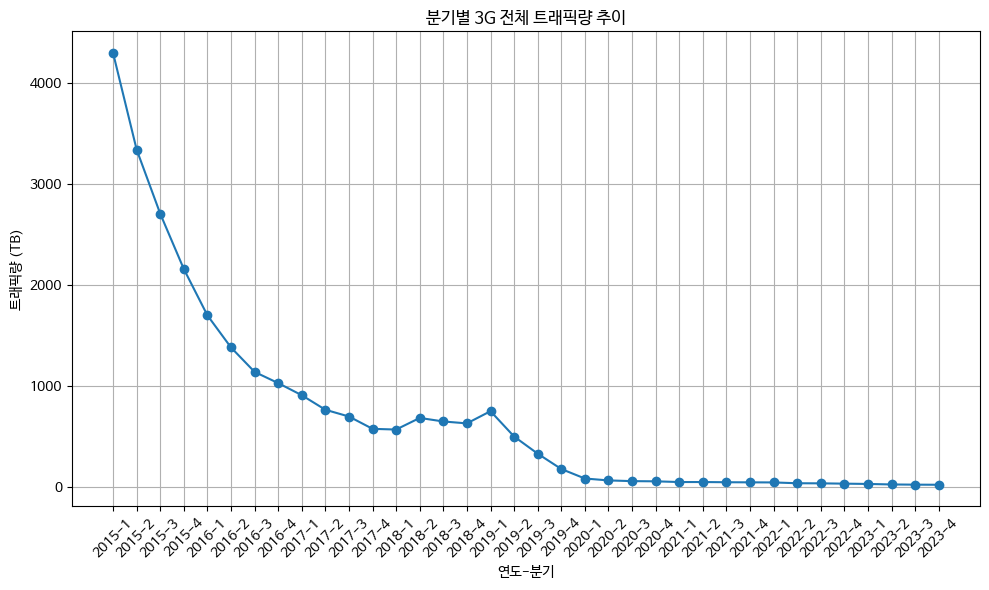

In [ ]:
# 분기별로 데이터 그룹화하여 트래픽량의 합계 계산
quarterly_traffic = df2.groupby('YearQuarter')['3G 전체 트래픽 (TB)'].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 분기별 트래픽량 추이 그래프
plt.plot(quarterly_traffic.index, quarterly_traffic.values, marker='o', linestyle='-')

# 그래프 제목과 축 라벨 설정
plt.title('분기별 3G 전체 트래픽량 추이')
plt.xlabel('연도-분기')
plt.ylabel('트래픽량 (TB)')

# 그래프 출력
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)
plt.tight_layout()
plt.show()

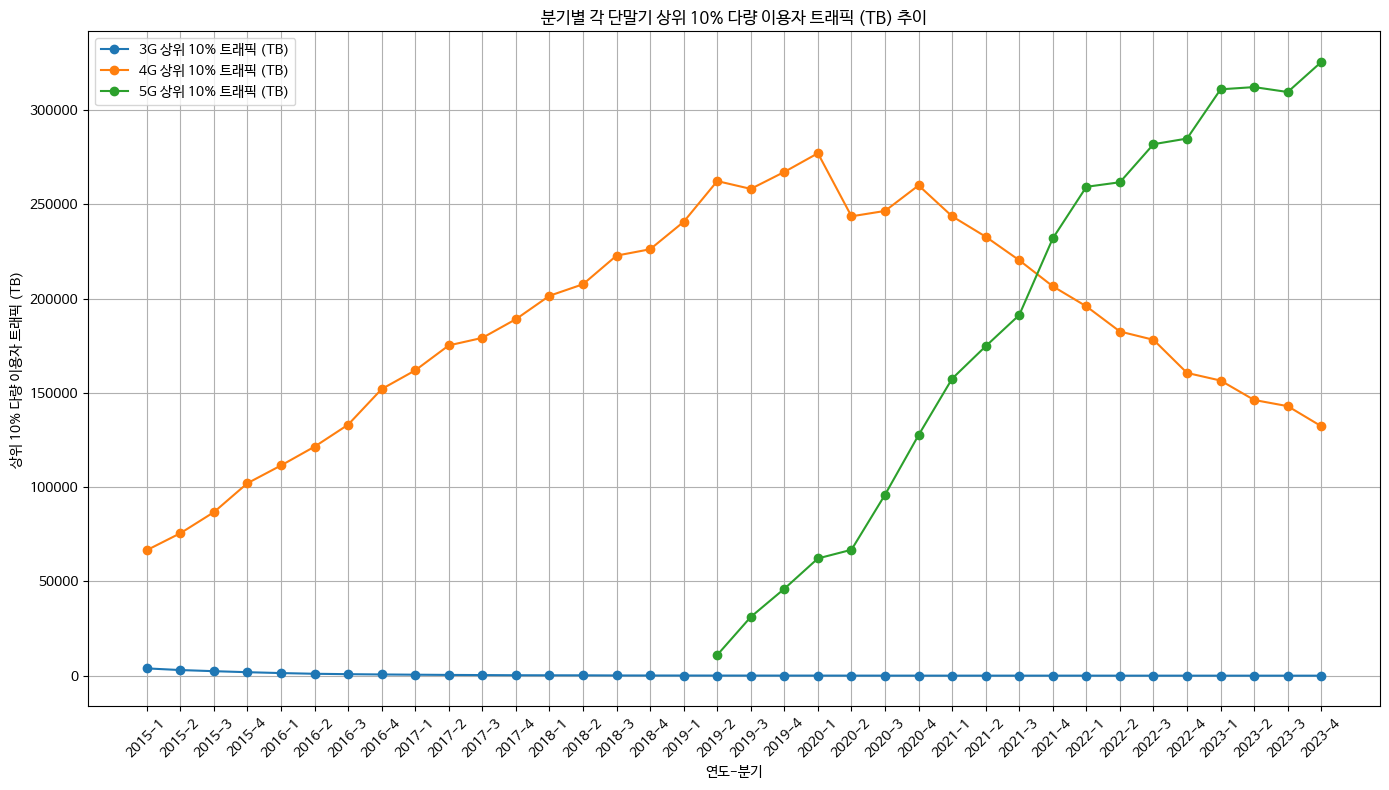

In [ ]:
# 분기별로 3G, 4G, 5G의 상위 10% 비중 추출
quarterly_3G = df2.groupby('YearQuarter')['3G 상위 10% 트래픽 (TB)'].mean()
quarterly_4G = df2.groupby('YearQuarter')['4G 상위 10% 트래픽 (TB)'].mean()
quarterly_5G = df2.groupby('YearQuarter')['5G 상위 10% 트래픽 (TB)'].mean()

# 그래프 그리기
plt.figure(figsize=(14, 8))

# 3G 상위 10% 비중 추이 그래프
plt.plot(quarterly_3G.index, quarterly_3G.values, marker='o', linestyle='-', label='3G 상위 10% 트래픽 (TB)')

# 4G 상위 10% 비중 추이 그래프
plt.plot(quarterly_4G.index, quarterly_4G.values, marker='o', linestyle='-', label='4G 상위 10% 트래픽 (TB)')

# 5G 상위 10% 비중 추이 그래프
plt.plot(quarterly_5G.index, quarterly_5G.values, marker='o', linestyle='-', label='5G 상위 10% 트래픽 (TB)')

# 그래프 제목과 축 라벨 설정
plt.title('분기별 각 단말기 상위 10% 다량 이용자 트래픽 (TB) 추이')
plt.xlabel('연도-분기')
plt.ylabel('상위 10% 다량 이용자 트래픽 (TB)')

# 범례 표시
plt.legend()

# 그래프 출력
plt.xticks(rotation=45)  # x축 라벨 회전
plt.grid(True)
plt.tight_layout()
plt.show()

상위 10% 다량 이용자의 트래픽량은 5G 단말기에서 더 가파른 상승세를 보인다.


In [ ]:

# 파일을 cp949로 인코딩하여 읽기
df3 = pd.read_csv("content_traffic.csv", encoding='cp949')

# 데이터 샘플 확인
df3.head()

,시점,합계 규모 (TB),합계 비중 (%),동영상 규모 (TB),동영상 비중 (%),멀티미디어 규모 (TB),멀티미디어 비중 (%),웹포털 규모 (TB),웹포털 비중 (%),SNS 규모 (TB),SNS 비중 (%),마켓다운로드 규모 (TB),마켓다운로드 비중 (%),기타 규모 (TB),기타 비중 (%)
0,2015.1/4,2803.7,100,1369.6,48.9,436.2,15.6,412.5,14.7,442.8,15.8,86.9,3.1,55.7,2.0
1,2015.2/4,2609.0,100,1391.0,53.3,218.3,8.4,457.6,17.5,417.1,16.0,55.5,2.1,69.6,2.7
2,2015.3/4,2983.7,100,1643.8,55.1,236.9,7.9,496.5,16.6,430.3,14.4,93.5,3.1,82.7,2.8
3,2015.4/4,3699.5,100,2112.6,57.1,201.5,5.4,586.6,15.9,601.7,16.3,120.7,3.3,76.4,2.1
4,2016.1/4,3746.0,100,2159.2,57.6,225.6,6.0,670.3,17.9,515.3,13.8,99.8,2.7,75.7,2.0


In [ ]:
# '시점' 열을 문자열로 변환하여 연도와 분기 분리
df3['Year'] = df3['시점'].str.split('.').str[0].astype(int)  # 연도 추출
df3['Quarter'] = df3['시점'].str.split('.').str[1].str.split('/').str[0].astype(int)  # 분기 추출

# '연도'와 '분기'를 이어주는 함수 정의
def combine_year_quarter(row):
    return str(row['Year']) + '-' + str(row['Quarter'])

# '시점' 열을 문자열로 변환하여 연도와 분기 분리
df3['Year'] = df3['시점'].str.split('.').str[0].astype(int)  # 연도 추출
df3['Quarter'] = df3['시점'].str.split('.').str[1].str.split('/').str[0].astype(int)  # 분기 추출

# '연도'와 '분기'를 이어주는 새로운 열 생성
df3['YearQuarter'] = df2.apply(combine_year_quarter, axis=1)

# 변환된 분기 정보 확인
print(df3[['시점', 'YearQuarter']])


          시점 YearQuarter
0   2015.1/4      2015-1
1   2015.2/4      2015-2
2   2015.3/4      2015-3
3   2015.4/4      2015-4
4   2016.1/4      2016-1
5   2016.2/4      2016-2
6   2016.3/4      2016-3
7   2016.4/4      2016-4
8   2017.1/4      2017-1
9   2017.2/4      2017-2
10  2017.3/4      2017-3
11  2017.4/4      2017-4
12  2018.1/4      2018-1
13  2018.2/4      2018-2
14  2018.3/4      2018-3
15  2018.4/4      2018-4
16  2019.1/4      2019-1
17  2019.2/4      2019-2
18  2019.3/4      2019-3
19  2019.4/4      2019-4
20  2020.1/4      2020-1
21  2020.2/4      2020-2
22  2020.3/4      2020-3
23  2020.4/4      2020-4
24  2021.1/4      2021-1
25  2021.2/4      2021-2
26  2021.3/4      2021-3
27  2021.4/4      2021-4
28  2022.1/4      2022-1
29  2022.2/4      2022-2
30  2022.3/4      2022-3
31  2022.4/4      2022-4
32  2023.1/4      2023-1
33  2023.2/4      2023-2
34  2023.3/4      2023-3
35  2023.4/4      2023-4


In [ ]:
df3.head()

,시점,합계 규모 (TB),합계 비중 (%),동영상 규모 (TB),동영상 비중 (%),멀티미디어 규모 (TB),멀티미디어 비중 (%),웹포털 규모 (TB),웹포털 비중 (%),SNS 규모 (TB),SNS 비중 (%),마켓다운로드 규모 (TB),마켓다운로드 비중 (%),기타 규모 (TB),기타 비중 (%),Year,Quarter,YearQuarter
0,2015.1/4,2803.7,100,1369.6,48.9,436.2,15.6,412.5,14.7,442.8,15.8,86.9,3.1,55.7,2.0,2015,1,2015-1
1,2015.2/4,2609.0,100,1391.0,53.3,218.3,8.4,457.6,17.5,417.1,16.0,55.5,2.1,69.6,2.7,2015,2,2015-2
2,2015.3/4,2983.7,100,1643.8,55.1,236.9,7.9,496.5,16.6,430.3,14.4,93.5,3.1,82.7,2.8,2015,3,2015-3
3,2015.4/4,3699.5,100,2112.6,57.1,201.5,5.4,586.6,15.9,601.7,16.3,120.7,3.3,76.4,2.1,2015,4,2015-4
4,2016.1/4,3746.0,100,2159.2,57.6,225.6,6.0,670.3,17.9,515.3,13.8,99.8,2.7,75.7,2.0,2016,1,2016-1


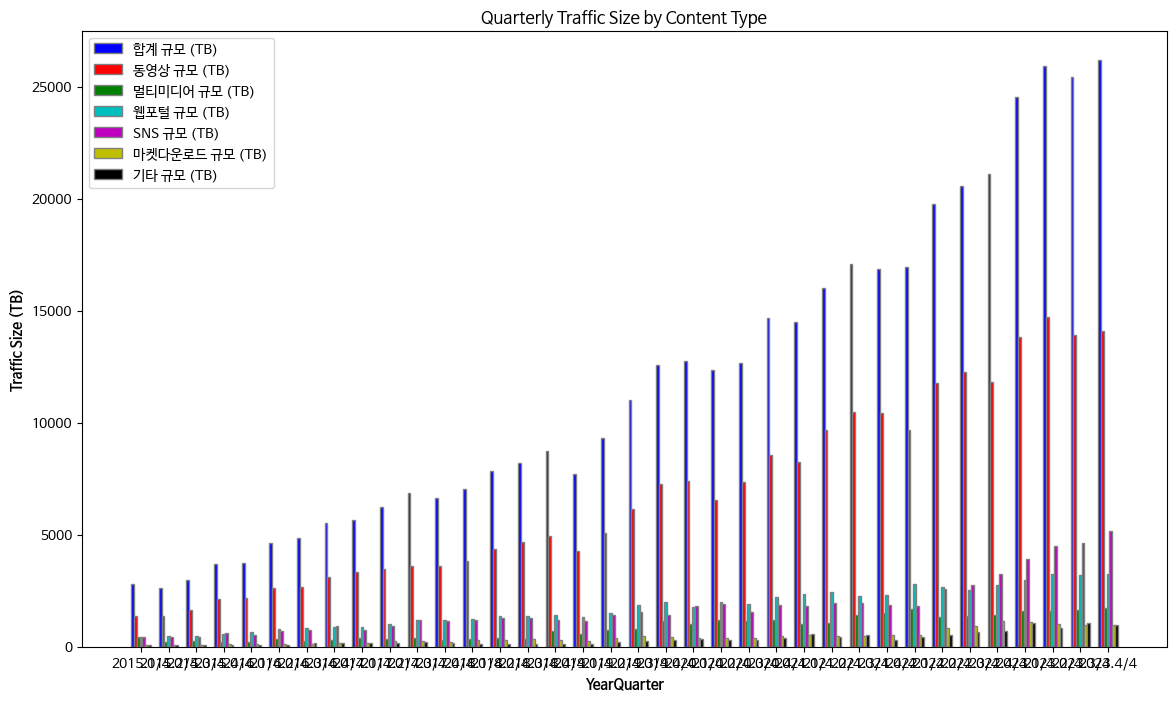

In [ ]:
# 카테고리 설정
categories = ['합계 규모 (TB)', '동영상 규모 (TB)', '멀티미디어 규모 (TB)', '웹포털 규모 (TB)', 'SNS 규모 (TB)', '마켓다운로드 규모 (TB)', '기타 규모 (TB)']
colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']

# 막대의 너비 설정
bar_width = 0.1

# x축 위치 설정
r = np.arange(len(df3['시점']))
positions = [r + i*bar_width for i in range(len(categories))]

# 그래프 설정
plt.figure(figsize=(14,8))

# 각 카테고리별 막대 추가
for pos, category, color in zip(positions, categories, colors):
    plt.bar(pos, df3[category], color=color, width=bar_width, edgecolor='grey', label=category)

# x축 레이블 설정
plt.xlabel('YearQuarter', fontweight='bold')
plt.xticks([r + 3*bar_width for r in range(len(df3['시점']))], df3['시점'])

# y축 레이블 설정
plt.ylabel('Traffic Size (TB)', fontweight='bold')

# 제목 설정
plt.title('Quarterly Traffic Size by Content Type')

# 범례 설정
plt.legend()

# 그래프 출력
plt.show()

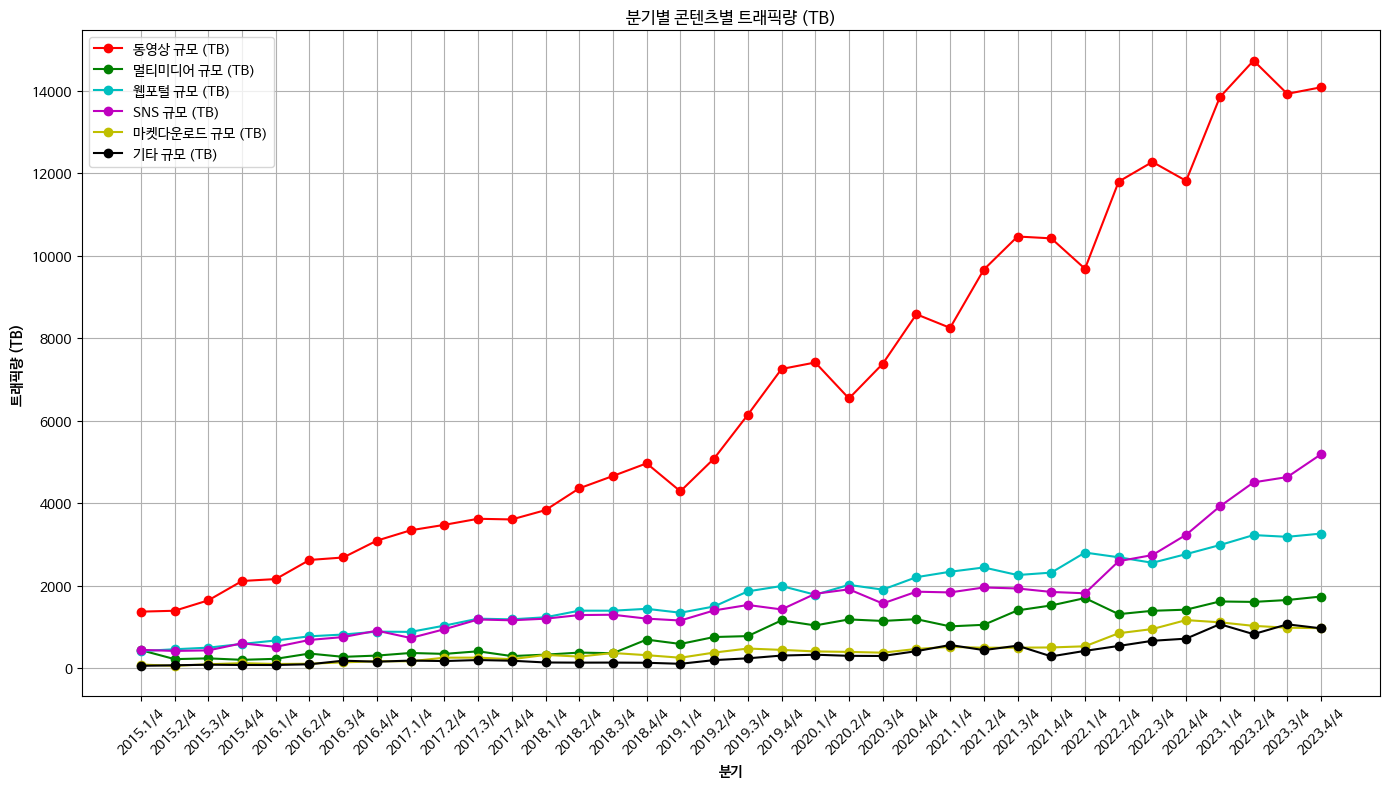

In [ ]:
# 그래프 설정
plt.figure(figsize=(14,8))

# 각 카테고리별 선 그래프 추가 (합계 규모 제외)
for category, color in zip(categories[1:], colors[1:]):  # 합계 규모 제외
    plt.plot(df3['시점'], df3[category], marker='o', color=color, label=category)

# x축 레이블 설정
plt.xlabel('분기', fontweight='bold')
plt.xticks(rotation=45)  # x축 눈금 라벨 회전

# y축 레이블 설정
plt.ylabel('트래픽량 (TB)', fontweight='bold')

# 제목 설정
plt.title('분기별 콘텐츠별 트래픽량 (TB)')

# 범례 설정
plt.legend()

# 그래프 출력
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


5G 단말기의 보급으로 영상 기술 면에서도 좋은 화질과 프레임률이 지원되며 영상 콘텐츠의 트래픽량이 훨씬 많아진 것을 알 수 있다.

또한 최근 SNS 콘텐츠가(인스타그램 릴스 등) 흥행하며 2022년도 이후 트래픽량이 급증한 것을 볼 수 있다.

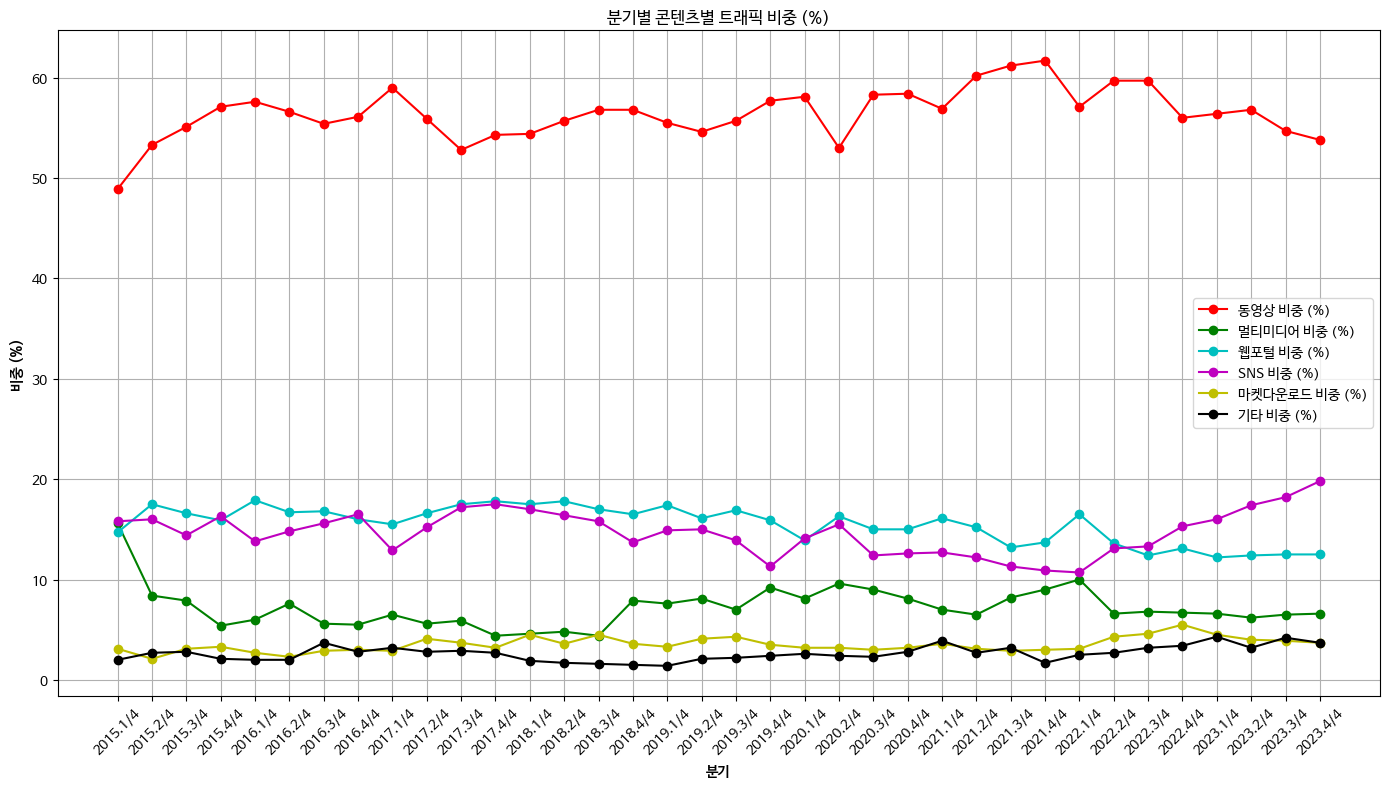

In [ ]:
# 비중을 나타내는 열들 선택
category2 = [ '동영상 비중 (%)', '멀티미디어 비중 (%)', '웹포털 비중 (%)', 'SNS 비중 (%)', '마켓다운로드 비중 (%)', '기타 비중 (%)']

# 그래프 설정
plt.figure(figsize=(14,8))

# 각 비중 (%) 열에 대한 선 그래프 추가
for category, color in zip(category2, colors[1:]):
    plt.plot(df3['시점'], df3[category], marker='o', color=color, label=category)

# x축 레이블 설정
plt.xlabel('분기', fontweight='bold')
plt.xticks(rotation=45)  # x축 눈금 라벨 회전

# y축 레이블 설정
plt.ylabel('비중 (%)', fontweight='bold')

# 제목 설정
plt.title('분기별 콘텐츠별 트래픽 비중 (%)')

# 범례 설정
plt.legend()

# 그래프 출력
plt.grid(True)  # 그리드 추가
plt.tight_layout()  # 레이아웃 조정
plt.show()


총 요약

5G 단말기의 등장으로 다른 단말기의 트래픽량이 감소하고 있으며 5G의 경우 가파른 상승세를 보인다. 5G 보급으로 콘텐츠들의 기술이 발전하고 지원되고 있으며 그에 따라 트래픽이 더 커진 것으로 추측된다.
가장 트래픽 비중이 큰 콘텐츠는 영상 콘텐츠였으며, 최근 SNS 트래픽량도 증가하는 추세를 볼 수 있다. 트래픽 비중이 높은 콘텐츠에 광고 등의 마케팅 전략을 세울 수 있다.

6G 발전
전반적인 영상이나 이미지 품질이 더 향상,
영상, SNS에서 실시간 인터랙티브 기술 활용, 모빌리티의 자율주행에서 실시간 네트워크 기술이 활용되어 5G 초기의 트래픽량 상승폭보다 훨씬 더 큰 상승폭을 가질 것이라 예측.
새로운 기술이다보니 인프라가 갖춰지고 대중의 의견을 참고하여 점진적으로 5G에서 6G로 점진적으로 전환될 것.
5G는 4G가 거쳐온 과정처럼 천천히 감소할 것이라 예상.